In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

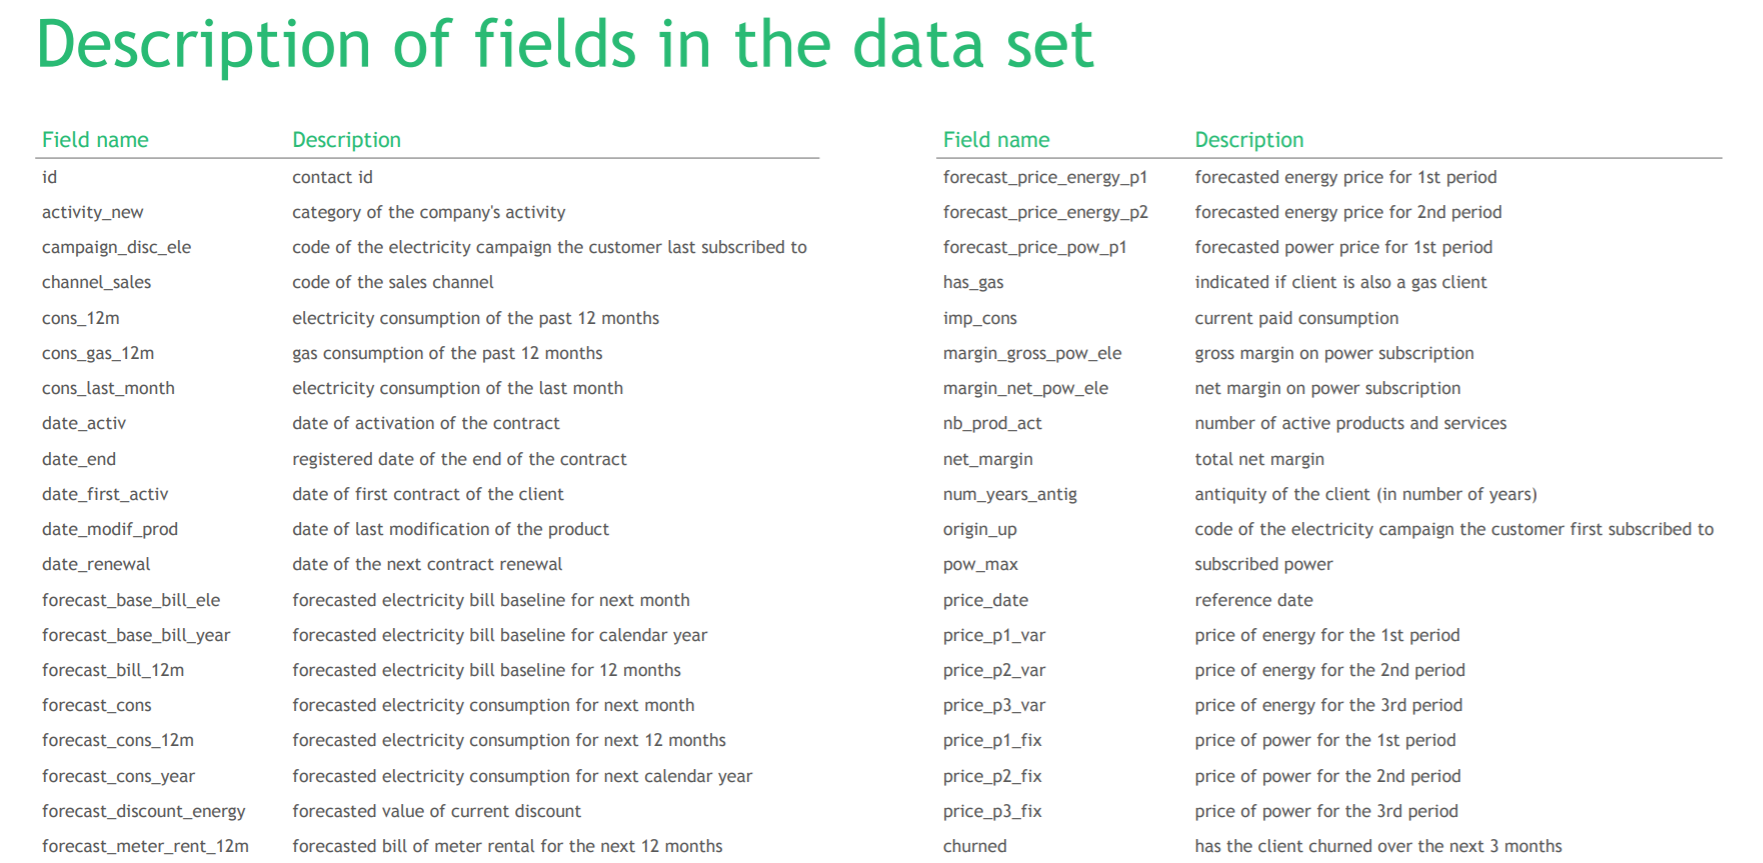

In [2]:
from IPython.display import Image
Image(filename = 'description.png')

In [3]:
df_data = pd.read_csv('data.csv')
df_data.shape

(16096, 25)

In [4]:
df_hist = pd.read_csv('hist.csv')
df_hist.shape

(192978, 8)

In [5]:
df_out = pd.read_csv('out.csv')
df_out.shape

(16096, 2)

## ----------------------------------------------------------------------------------------

In [6]:
df_final = pd.merge(df_data, df_out, on = 'id')
df_final.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,year_activ,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025,...,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,2012,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,2013,1


In [7]:
df_final.shape

(16096, 26)

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   cons_12m                  16096 non-null  int64  
 2   cons_gas_12m              16096 non-null  int64  
 3   cons_last_month           16096 non-null  int64  
 4   date_activ                16096 non-null  object 
 5   date_end                  16096 non-null  object 
 6   date_modif_prod           16096 non-null  object 
 7   date_renewal              16096 non-null  object 
 8   forecast_cons_12m         16096 non-null  float64
 9   forecast_cons_year        16096 non-null  int64  
 10  forecast_discount_energy  16096 non-null  float64
 11  forecast_meter_rent_12m   16096 non-null  float64
 12  forecast_price_energy_p1  16096 non-null  float64
 13  forecast_price_energy_p2  16096 non-null  float64
 14  foreca

In [9]:
df_final['date_activ'] = pd.to_datetime(df_final['date_activ'])
df_final['date_end'] = pd.to_datetime(df_final['date_end'])
df_final['date_modif_prod'] = pd.to_datetime(df_final['date_modif_prod'])
df_final['date_renewal'] = pd.to_datetime(df_final['date_renewal'])

In [10]:
df_gas_churn = pd.crosstab(df_final['churn'], df_final['has_gas'], normalize = 'columns')
df_gas_churn

has_gas,f,t
churn,,
0,0.89636,0.921053
1,0.10364,0.078947


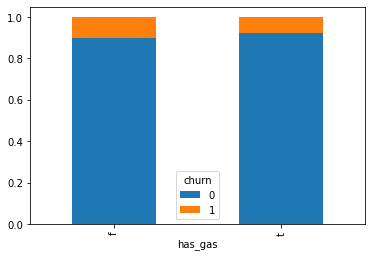

In [11]:
df_gas_churn.T.plot(kind = 'bar', stacked = True)
plt.show()

In [12]:
df_origin_churn = pd.crosstab(df_final['churn'], df_final['origin_up'], normalize = 'columns')
df_origin_churn

origin_up,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
churn,,,,,
0,1.0,0.941228,0.914239,0.871398,1.0
1,0.0,0.058772,0.085761,0.128602,0.0


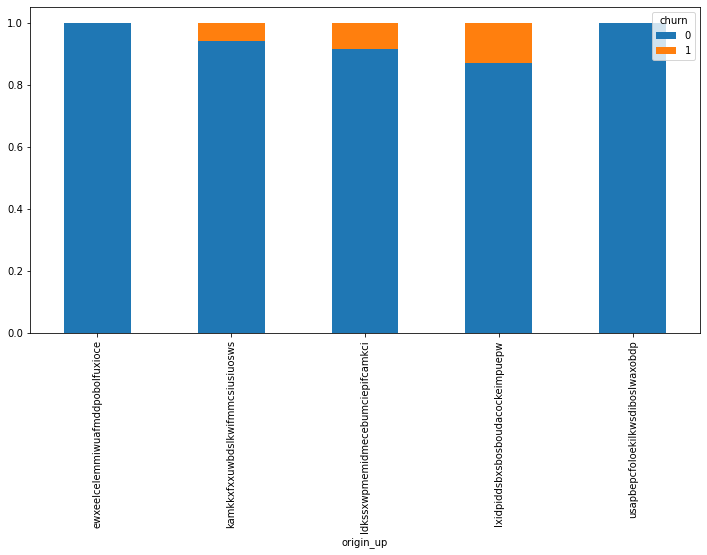

In [13]:
df_origin_churn.T.plot(kind = 'bar', stacked = True, figsize = (12,6))
plt.show()

In [14]:
df_hist.head(2)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [15]:
df_hist[df_hist['id'] == '48ada52261e7cf58715202705a0451c9']

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
99174,48ada52261e7cf58715202705a0451c9,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260
99175,48ada52261e7cf58715202705a0451c9,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260
99176,48ada52261e7cf58715202705a0451c9,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260
99177,48ada52261e7cf58715202705a0451c9,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260
99178,48ada52261e7cf58715202705a0451c9,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260
99179,48ada52261e7cf58715202705a0451c9,2015-06-01,0.106043,0.093474,0.067378,58.936780,36.344721,8.334263
99180,48ada52261e7cf58715202705a0451c9,2015-07-01,0.106043,0.093474,0.067378,58.936780,36.344721,8.334263
99181,48ada52261e7cf58715202705a0451c9,2015-08-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263
99182,48ada52261e7cf58715202705a0451c9,2015-09-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263
99183,48ada52261e7cf58715202705a0451c9,2015-10-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263


In [16]:
df_final[df_final['id'] == '48ada52261e7cf58715202705a0451c9'].T

,0
id,48ada52261e7cf58715202705a0451c9
cons_12m,309275
cons_gas_12m,0
cons_last_month,10025
date_activ,2012-11-07 00:00:00
date_end,2016-11-06 00:00:00
date_modif_prod,2012-11-07 00:00:00
date_renewal,2015-11-09 00:00:00
forecast_cons_12m,26520.3
forecast_cons_year,10025


In [17]:
g1 = df_hist.groupby('id')
df_avg = pd.DataFrame()
df_avg['p1_var'] = g1['price_p1_var'].mean()
df_avg['p2_var'] = g1['price_p2_var'].mean()
df_avg['p3_var'] = g1['price_p3_var'].mean()
df_avg['p1_fix'] = g1['price_p1_fix'].mean()
df_avg['p2_fix'] = g1['price_p2_fix'].mean()
df_avg['p3_fix'] = g1['price_p3_fix'].mean()
df_avg.head(2)

,p1_var,p2_var,p3_var,p1_fix,p2_fix,p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000


In [18]:
df_final['tenure'] = df_final['date_end'] - df_final['date_activ']

In [19]:
df_final['tenure'].head(2)

0   1460 days
1   1096 days
Name: tenure, dtype: timedelta64[ns]

In [20]:
df_final['tenure'] = round(df_final['tenure']/np.timedelta64(1, 'Y'), 2)
df_final['tenure']

0        4.00
1        3.00
2        7.03
3        6.00
4        6.00
         ... 
16091    3.96
16092    4.00
16093    4.00
16094    4.00
16095    7.00
Name: tenure, Length: 16096, dtype: float64

In [21]:
df_final['tenure'] = df_final['tenure'].astype('int')
df_final['tenure']

0        4
1        3
2        7
3        6
4        6
        ..
16091    3
16092    4
16093    4
16094    4
16095    7
Name: tenure, Length: 16096, dtype: int32

In [22]:
df_final['modif_renew'] = df_final['date_renewal'] - df_final['date_modif_prod']
df_final['modif_renew'].head(2)

0   1097 days
1   -131 days
Name: modif_renew, dtype: timedelta64[ns]

In [23]:
df_final['modif_renew'] = round(df_final['modif_renew']/np.timedelta64(1, 'Y'), 2)
df_final['modif_renew']

0        3.00
1       -0.36
2        6.03
3        5.00
4        5.00
         ... 
16091   -0.95
16092    3.00
16093    3.00
16094    3.00
16095    6.01
Name: modif_renew, Length: 16096, dtype: float64

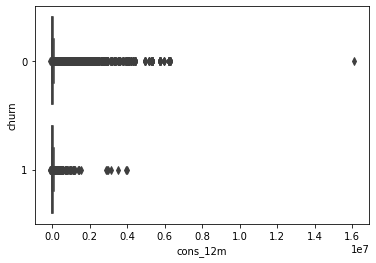

______________________________________________________________________


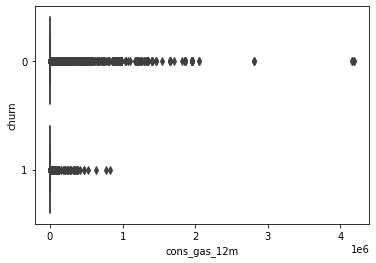

______________________________________________________________________


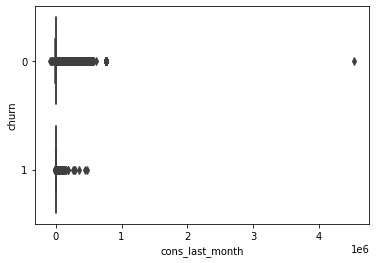

______________________________________________________________________


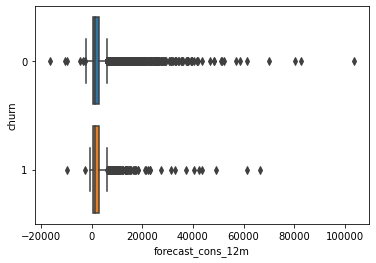

______________________________________________________________________


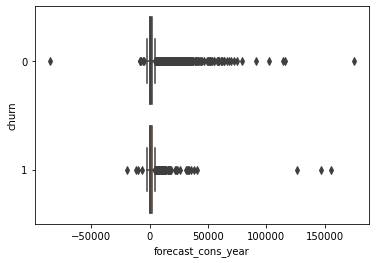

______________________________________________________________________


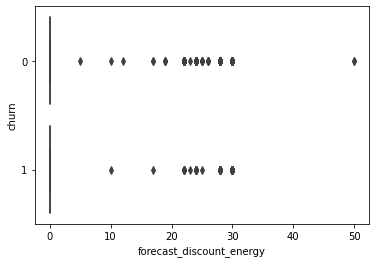

______________________________________________________________________


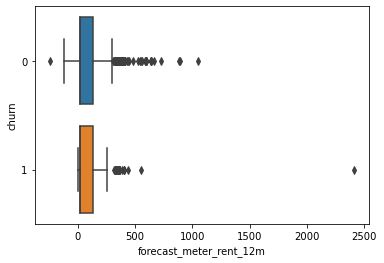

______________________________________________________________________


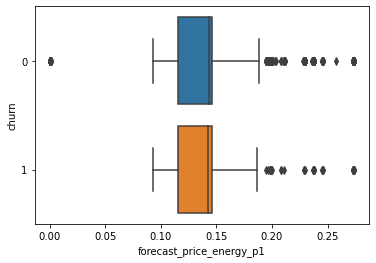

______________________________________________________________________


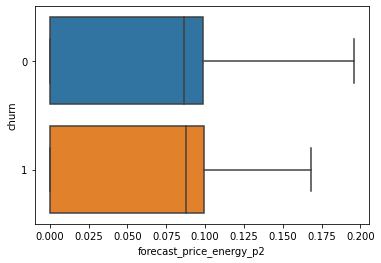

______________________________________________________________________


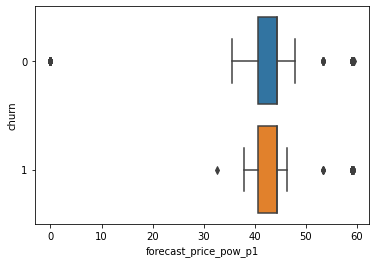

______________________________________________________________________


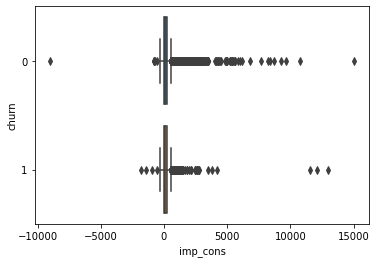

______________________________________________________________________


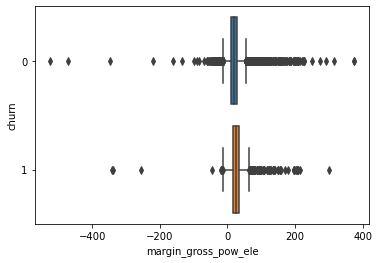

______________________________________________________________________


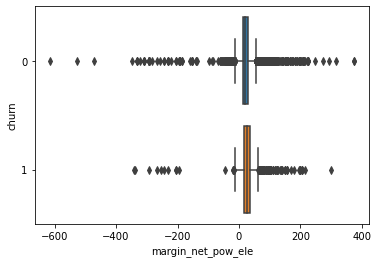

______________________________________________________________________


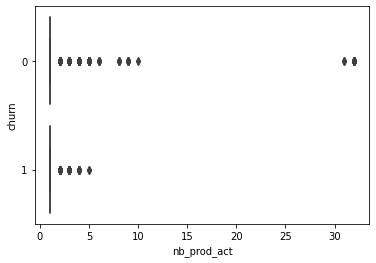

______________________________________________________________________


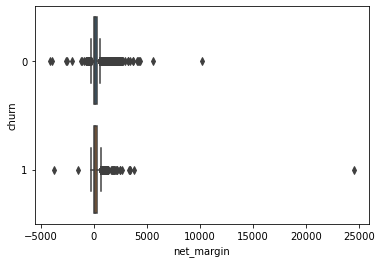

______________________________________________________________________


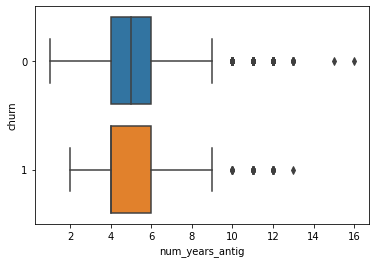

______________________________________________________________________


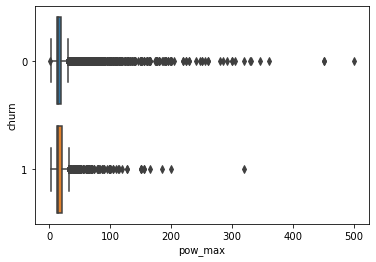

______________________________________________________________________


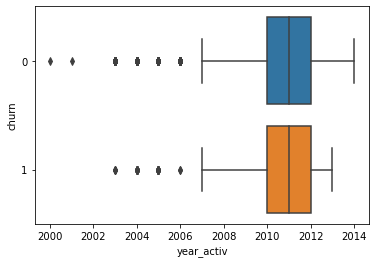

______________________________________________________________________


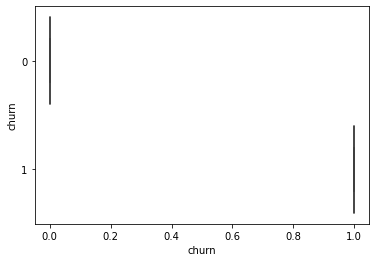

______________________________________________________________________


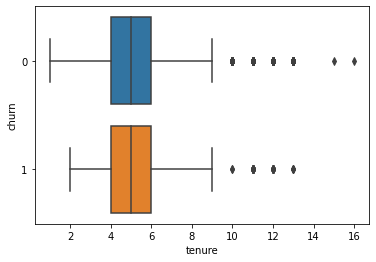

______________________________________________________________________


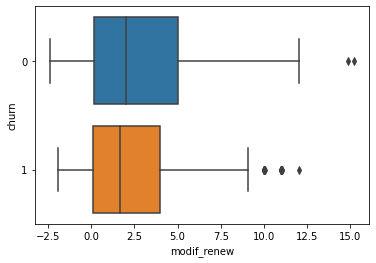

______________________________________________________________________


In [24]:
for i in df_final.select_dtypes(include = np.number).columns:
    sns.boxplot(y = df_final['churn'], x = df_final[i], orient = 'horizontal')
    plt.show()
    print('_'*70)

In [25]:
g1 = df_hist[df_hist['price_date'] > '2015-06-01'].groupby('id')
df_6m = pd.DataFrame()
df_6m['p1_var_6m'] = g1['price_p1_var'].mean()
df_6m['p2_var_6m'] = g1['price_p2_var'].mean()
df_6m['p3_var_6m'] = g1['price_p3_var'].mean()
df_6m['p1_fix_6m'] = g1['price_p1_fix'].mean()
df_6m['p2_fix_6m'] = g1['price_p2_fix'].mean()
df_6m['p3_fix_6m'] = g1['price_p3_fix'].mean()
df_6m.head(2)

,p1_var_6m,p2_var_6m,p3_var_6m,p1_fix_6m,p2_fix_6m,p3_fix_6m
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000


In [26]:
df_6m['price_p1_6m'] = df_6m['p1_var_6m'] + df_6m['p1_fix_6m']
df_6m['price_p2_6m'] = df_6m['p2_var_6m'] + df_6m['p2_fix_6m']
df_6m['price_p3_6m'] = df_6m['p3_var_6m'] + df_6m['p3_fix_6m']
df_6m.head(2)

,p1_var_6m,p2_var_6m,p3_var_6m,p1_fix_6m,p2_fix_6m,p3_fix_6m,price_p1_6m,price_p2_6m,price_p3_6m
id,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000


In [27]:
g1 = df_hist[df_hist['price_date'] > '2015-09-01'].groupby('id')
df_3m = pd.DataFrame()
df_3m['p1_var_3m'] = g1['price_p1_var'].mean()
df_3m['p2_var_3m'] = g1['price_p2_var'].mean()
df_3m['p3_var_3m'] = g1['price_p3_var'].mean()
df_3m['p1_fix_3m'] = g1['price_p1_fix'].mean()
df_3m['p2_fix_3m'] = g1['price_p2_fix'].mean()
df_3m['p3_fix_3m'] = g1['price_p3_fix'].mean()
df_3m.head(2)

,p1_var_3m,p2_var_3m,p3_var_3m,p1_fix_3m,p2_fix_3m,p3_fix_3m
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000


In [28]:
df_3m['price_p1_3m'] = df_3m['p1_var_3m'] + df_3m['p1_fix_3m']
df_3m['price_p2_3m'] = df_3m['p2_var_3m'] + df_3m['p2_fix_3m']
df_3m['price_p3_3m'] = df_3m['p3_var_3m'] + df_3m['p3_fix_3m']
df_3m.head(2)

,p1_var_3m,p2_var_3m,p3_var_3m,p1_fix_3m,p2_fix_3m,p3_fix_3m,price_p1_3m,price_p2_3m,price_p3_3m
id,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000


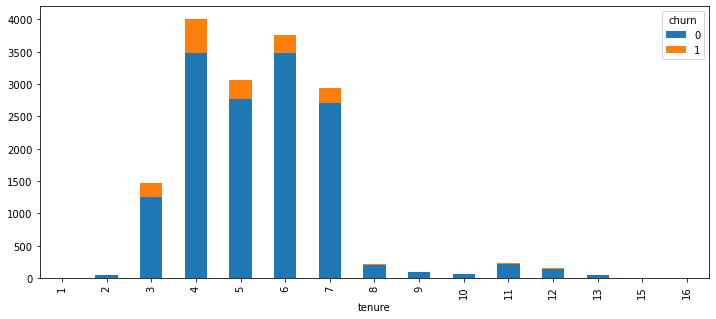

In [29]:
pd.crosstab(df_final['churn'], df_final['tenure']).T.plot(
    kind = 'bar', stacked = True, figsize = (12,5))
plt.show()

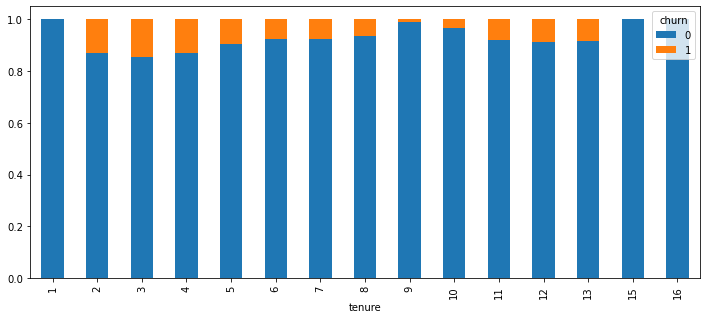

In [30]:
pd.crosstab(df_final['churn'], df_final['tenure'],
            normalize = 'columns').T.plot(kind = 'bar', stacked = True, figsize = (12,5))
plt.show()

In [31]:
def convert_months(reference_date, dataframe, column):
    time_delta = reference_date - dataframe[column]
    months = (time_delta / np.timedelta64(1, "M")).astype(int)
    return months

In [32]:
# Create reference date as provided on the exercise statement
REFERENCE_DATE = datetime.datetime(2016,1,1)

In [33]:
df_final["months_activ"] = convert_months(REFERENCE_DATE, df_final, "date_activ")
df_final["months_to_end"] = -convert_months(REFERENCE_DATE, df_final, "date_end")
df_final["months_modif_prod"] = convert_months(REFERENCE_DATE, df_final, "date_modif_prod")
df_final["months_renewal"] = convert_months(REFERENCE_DATE, df_final, "date_renewal")

In [34]:
df_final.shape

(16096, 32)

In [35]:
def plot_churn_by_month(df, col):
    pd.crosstab(df['churn'], df[col]).T.plot(kind = 'bar', stacked = True, figsize = (20,10))
    plt.legend(['Retention', 'Churn'], loc = 'upper right')
    plt.title(col)
    plt.xlabel('Number of Months')
    plt.ylabel('Number of Companies')
    plt.show()

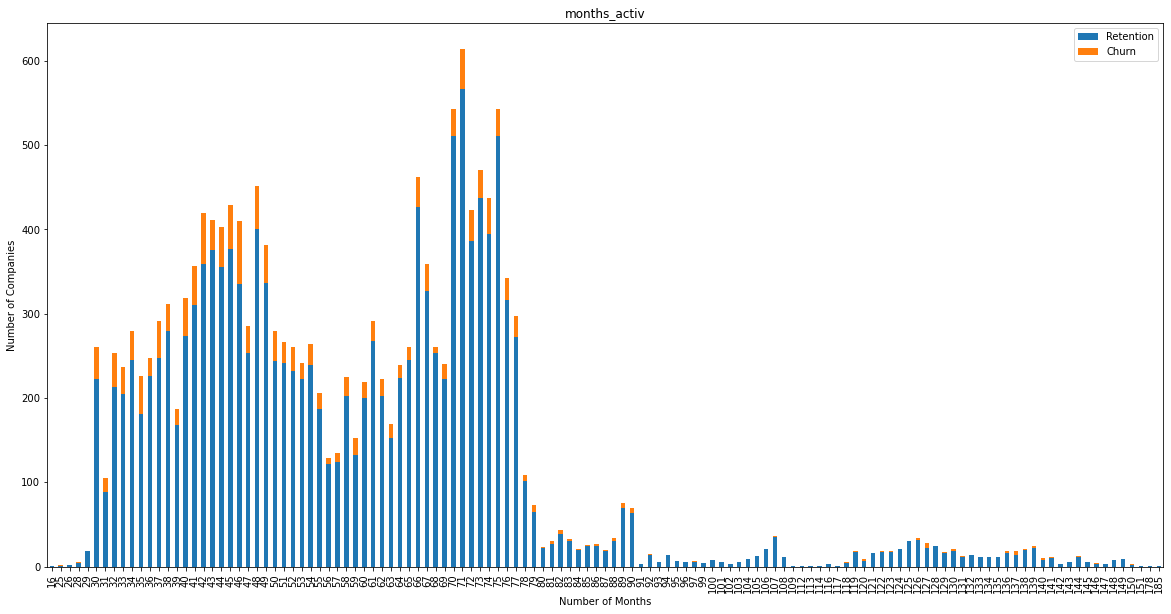

In [36]:
plot_churn_by_month(df_final, 'months_activ')

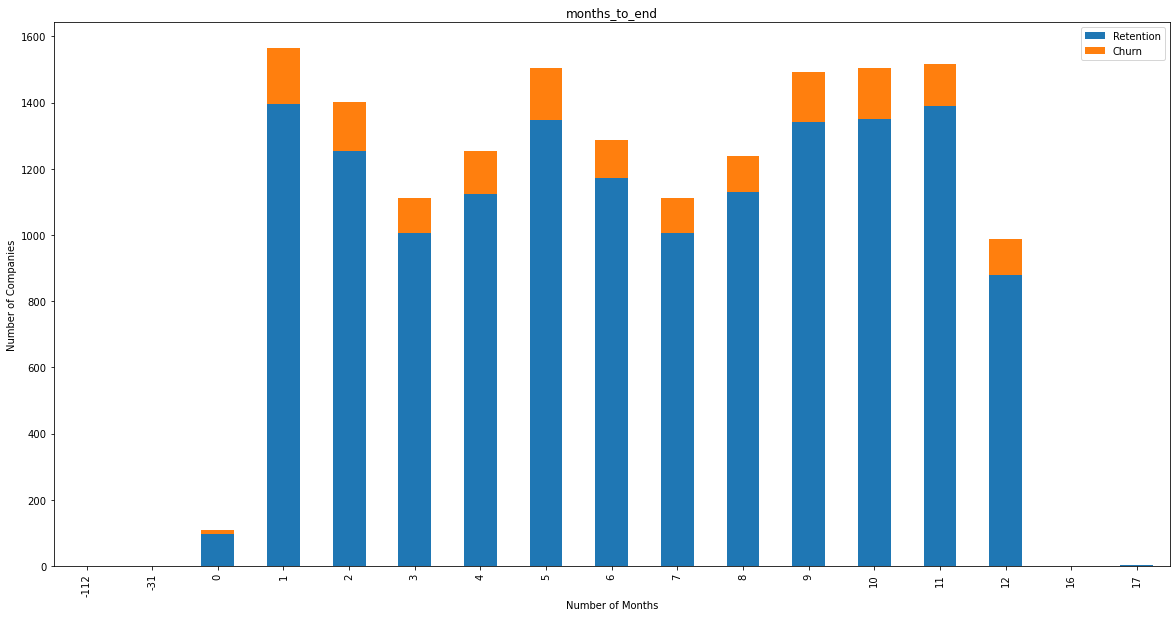

In [37]:
plot_churn_by_month(df_final, 'months_to_end')

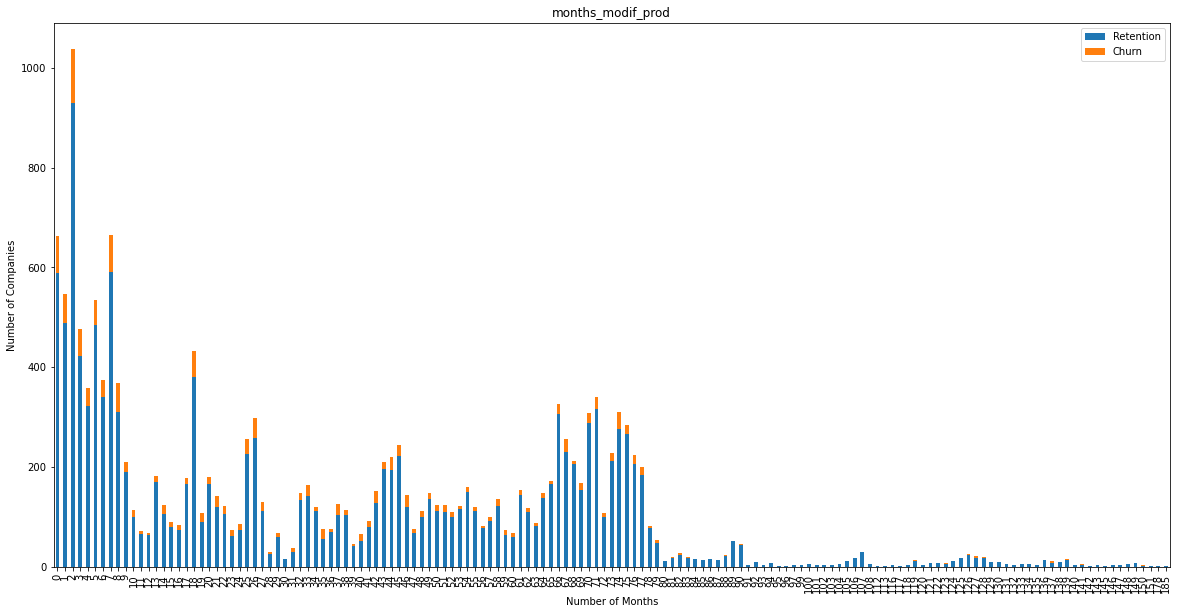

In [38]:
plot_churn_by_month(df_final, 'months_modif_prod')

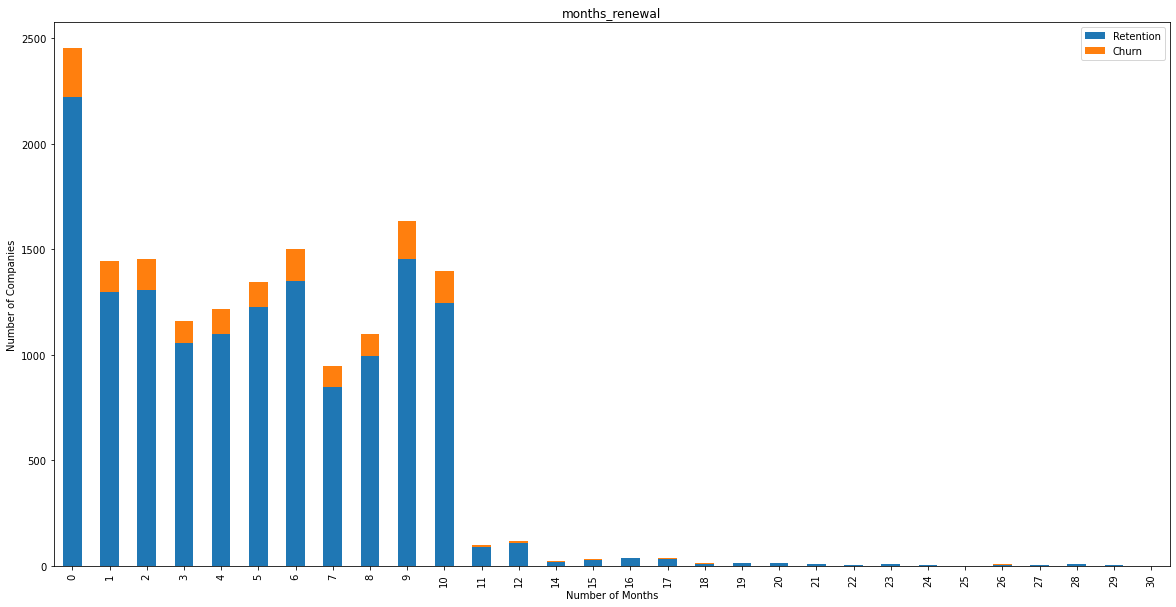

In [39]:
plot_churn_by_month(df_final, 'months_renewal')

### Categorical Columns

In [40]:
df_final.select_dtypes(include = 'object').columns

Index(['id', 'has_gas', 'origin_up'], dtype='object')

In [41]:
df_final['origin_up'].isnull().sum(), df_final['has_gas'].isnull().sum()

(0, 0)

In [42]:
df_final = pd.get_dummies(df_final, columns = ['has_gas', 'origin_up'], drop_first = True)
df_final.shape

(16096, 35)

In [43]:
print('Negative values in cons_12m :', df_final.loc[df_final.cons_12m < 0, :].shape[0])
print('Negative values in cons_gas_12m :', df_final.loc[df_final.cons_gas_12m < 0, :].shape[0])
print('Negative values in cons_last_month :', df_final.loc[df_final.cons_last_month < 0, :].shape[0])
print('Negative values in forecast_cons_12m :', df_final.loc[df_final.forecast_cons_12m < 0, :].shape[0])
print('Negative values in forecast_cons_year :', df_final.loc[df_final.forecast_cons_year < 0, :].shape[0])
print('Negative values in forecast_meter_rent_12m :', df_final.loc[df_final.forecast_meter_rent_12m < 0, :].shape[0])
print('Negative values in imp_cons :', df_final.loc[df_final.imp_cons < 0, :].shape[0])

Negative values in cons_12m : 27
Negative values in cons_gas_12m : 6
Negative values in cons_last_month : 46
Negative values in forecast_cons_12m : 41
Negative values in forecast_cons_year : 25
Negative values in forecast_meter_rent_12m : 4
Negative values in imp_cons : 27


In [44]:
# Remove negative values
df_final.loc[df_final.cons_12m < 0,"cons_12m"] = np.nan
df_final.loc[df_final.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
df_final.loc[df_final.cons_last_month < 0,"cons_last_month"] = np.nan
df_final.loc[df_final.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
df_final.loc[df_final.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
df_final.loc[df_final.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
df_final.loc[df_final.imp_cons < 0,"imp_cons"] = np.nan

In [45]:
# Apply log10 transformation
df_final["cons_12m"] = np.log10(df_final["cons_12m"]+1)
df_final["cons_gas_12m"] = np.log10(df_final["cons_gas_12m"]+1)
df_final["cons_last_month"] = np.log10(df_final["cons_last_month"]+1)
df_final["forecast_cons_12m"] = np.log10(df_final["forecast_cons_12m"]+1)
df_final["forecast_cons_year"] = np.log10(df_final["forecast_cons_year"]+1)
df_final["forecast_meter_rent_12m"] = np.log10(df_final["forecast_meter_rent_12m"]+1)
df_final["imp_cons"] = np.log10(df_final["imp_cons"]+1)

C:\Users\anura\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


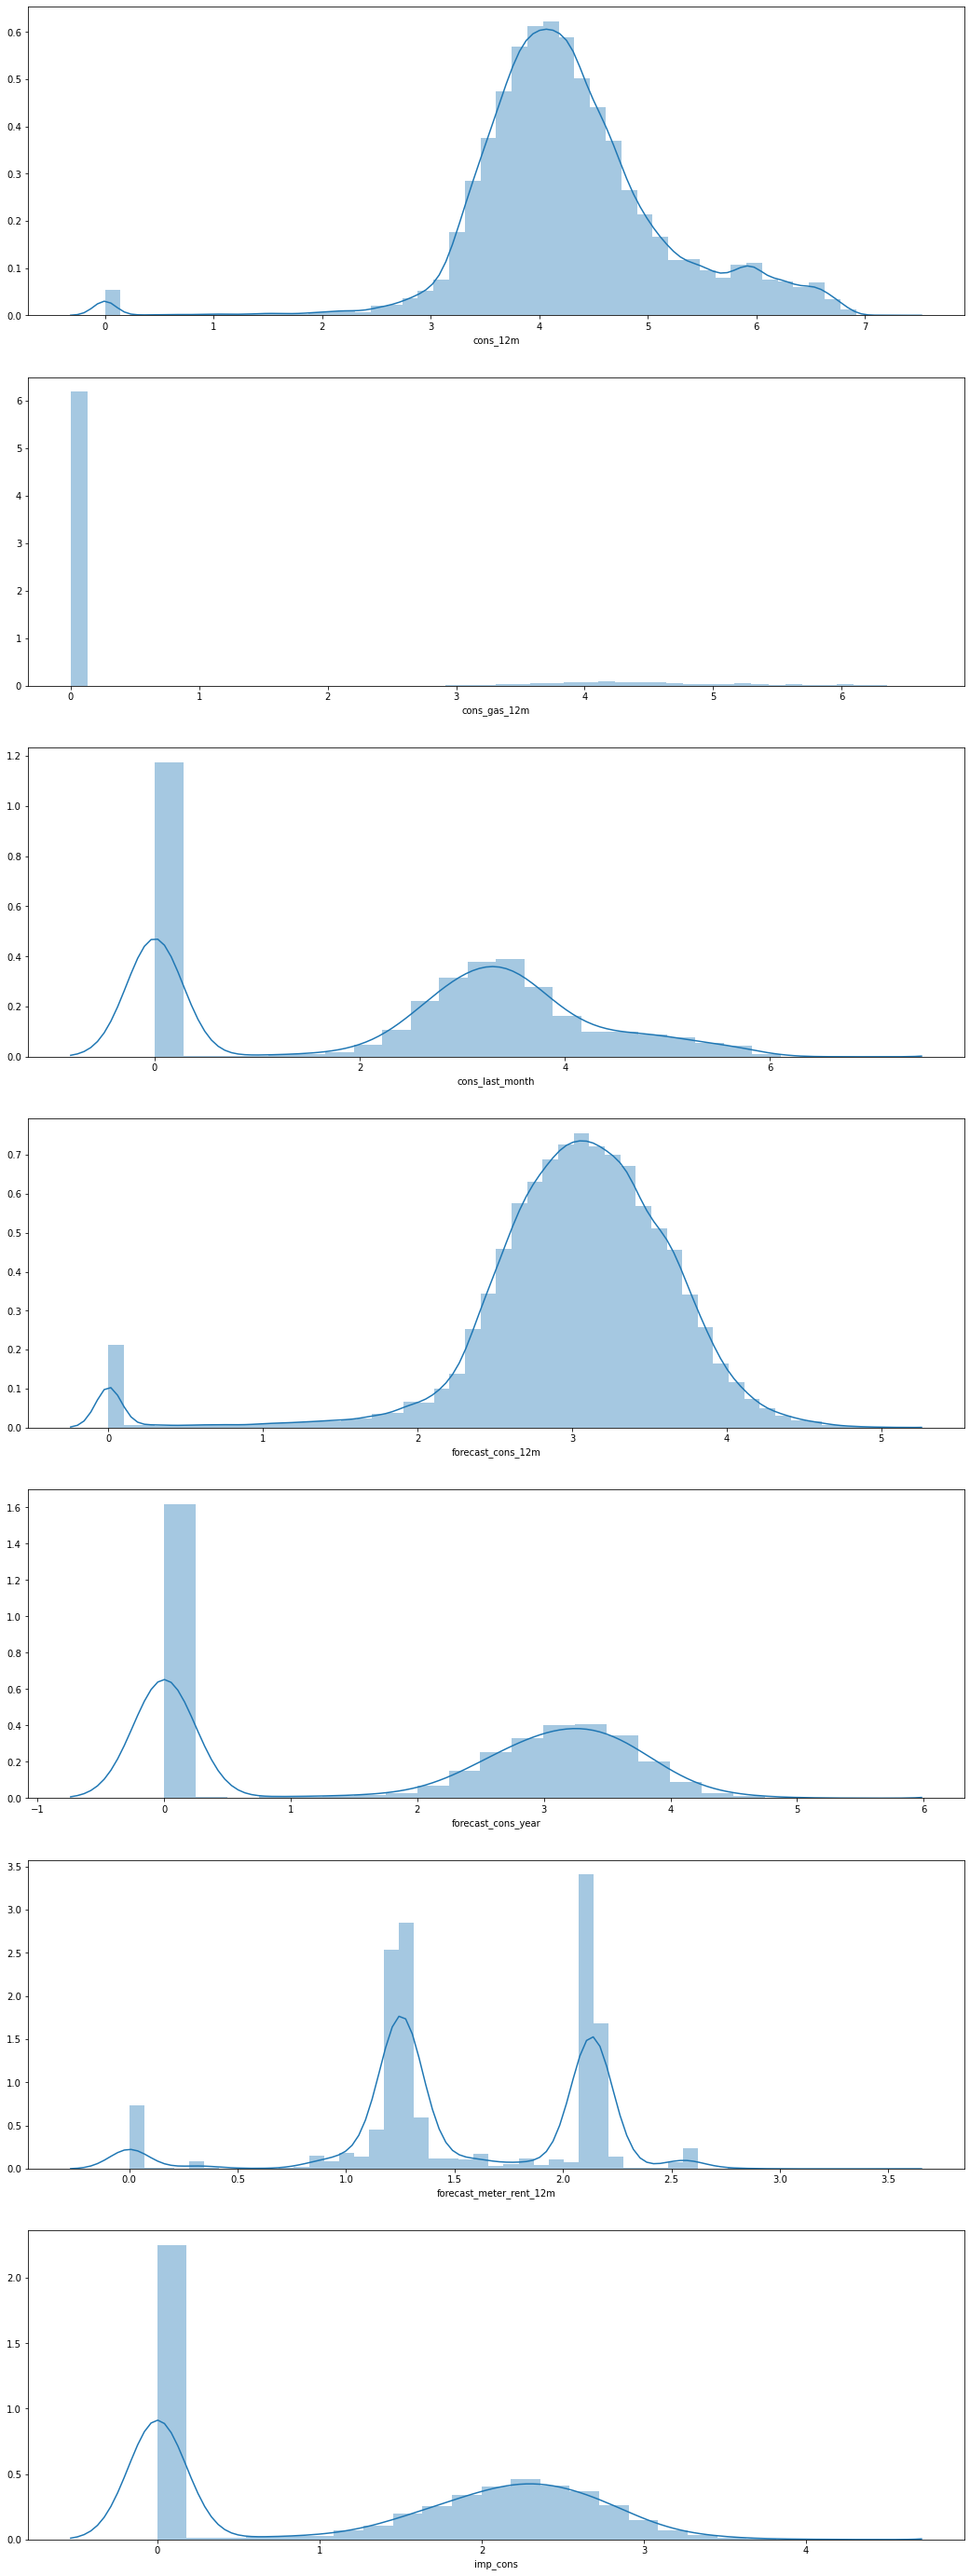

In [46]:
fig, axes = plt.subplots(nrows = 7, figsize = (18, 50))
sns.distplot(df_final['cons_12m'].dropna(), ax = axes[0])
sns.distplot(df_final['cons_gas_12m'].dropna(), ax = axes[1])
sns.distplot(df_final['cons_last_month'].dropna(), ax = axes[2])
sns.distplot(df_final['forecast_cons_12m'].dropna(), ax = axes[3])
sns.distplot(df_final['forecast_cons_year'].dropna(), ax = axes[4])
sns.distplot(df_final['forecast_meter_rent_12m'].dropna(), ax = axes[5])
sns.distplot(df_final['imp_cons'].dropna(), ax = axes[6])
plt.show()

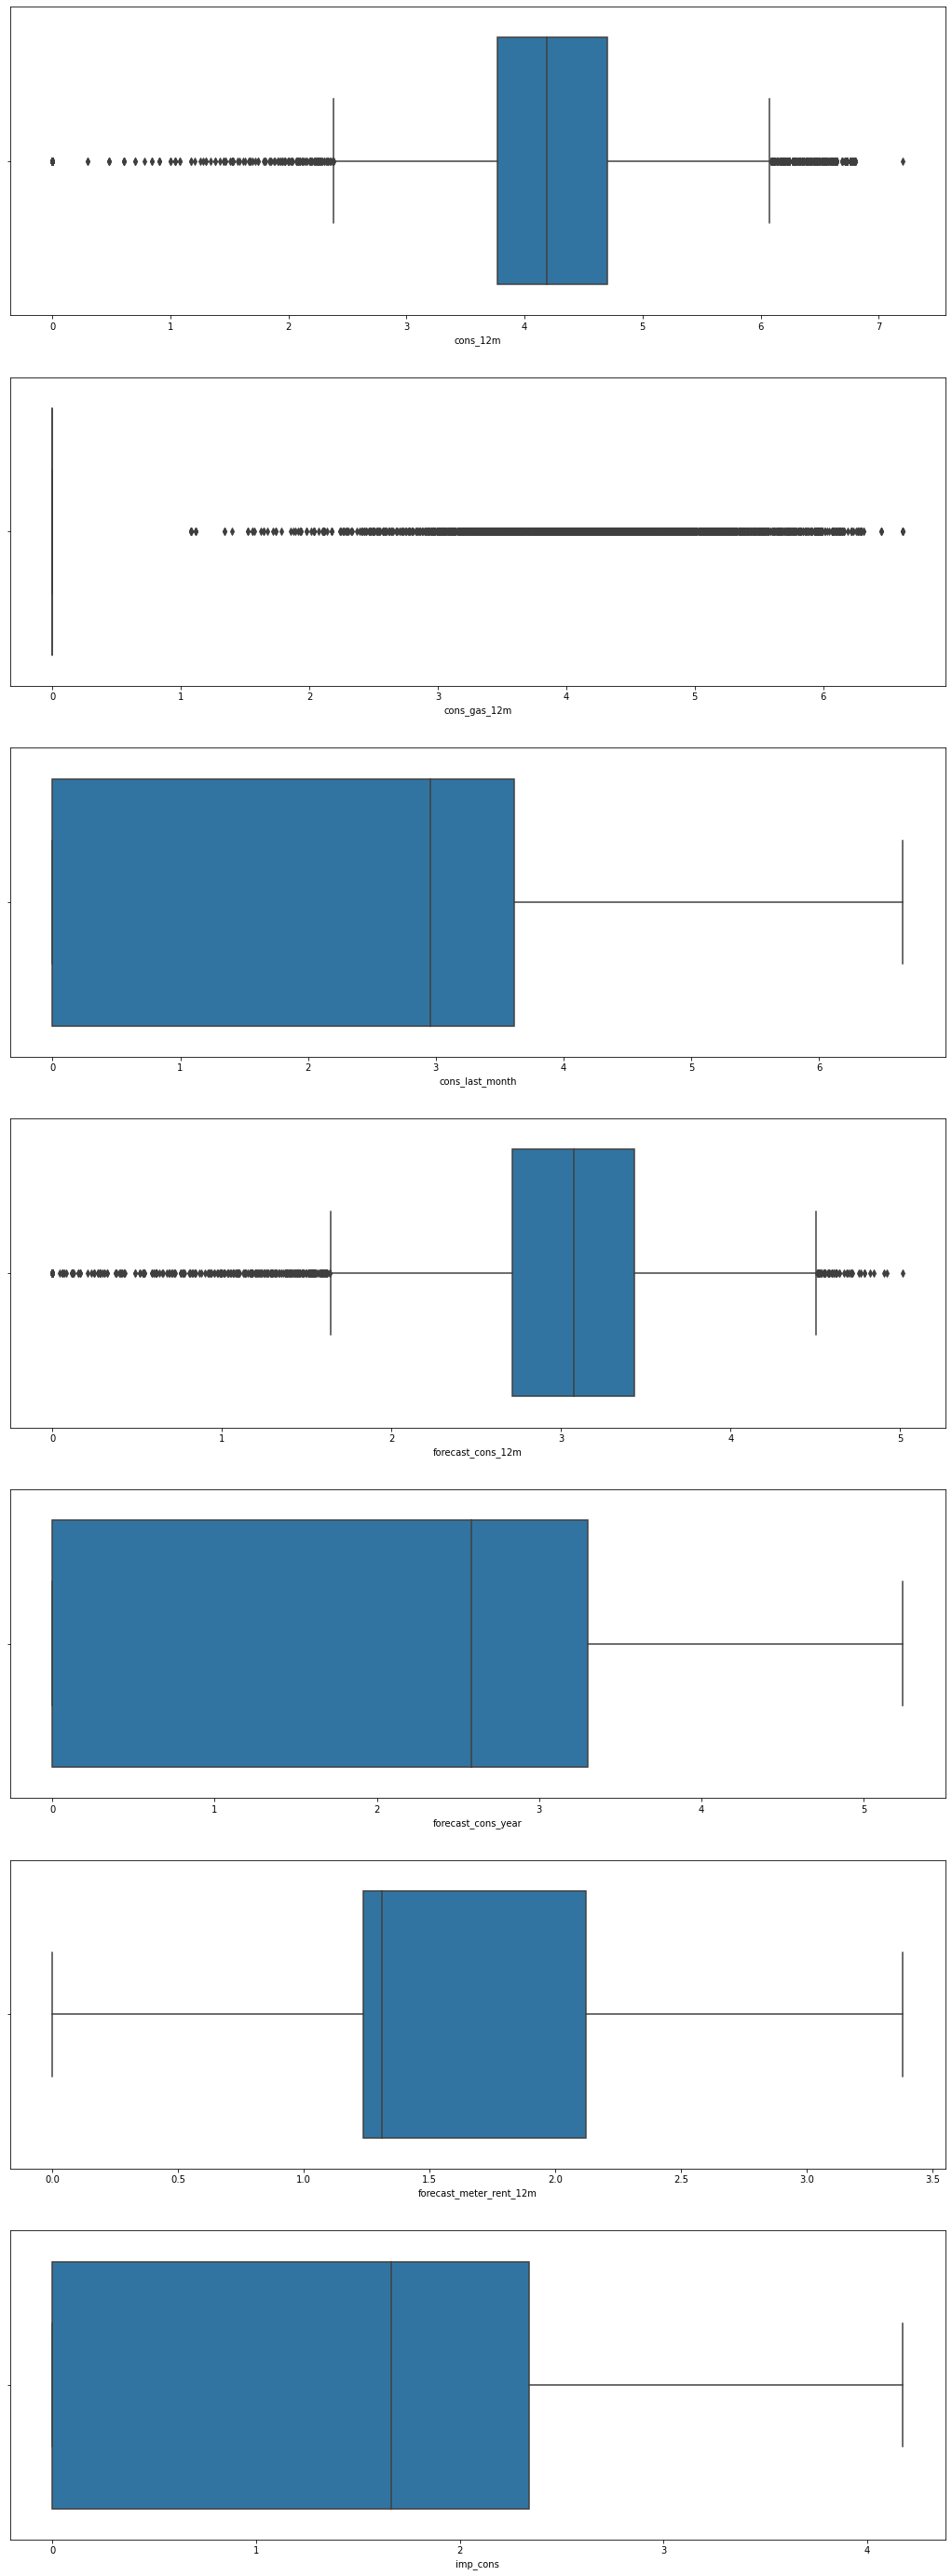

In [47]:
fig, axes = plt.subplots(nrows = 7, figsize = (18, 50))
sns.boxplot(df_final['cons_12m'].dropna(), ax = axes[0])
sns.boxplot(df_final['cons_gas_12m'].dropna(), ax = axes[1])
sns.boxplot(df_final['cons_last_month'].dropna(), ax = axes[2])
sns.boxplot(df_final['forecast_cons_12m'].dropna(), ax = axes[3])
sns.boxplot(df_final['forecast_cons_year'].dropna(), ax = axes[4])
sns.boxplot(df_final['forecast_meter_rent_12m'].dropna(), ax = axes[5])
sns.boxplot(df_final['imp_cons'].dropna(), ax = axes[6])
plt.show()

In [48]:
df_final.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,modif_renew,months_activ,months_to_end,months_modif_prod,months_renewal,has_gas_t,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
cons_12m,1.000000,0.228876,0.647210,0.581020,0.353134,-0.033140,0.233436,-0.193603,0.301908,-0.107484,...,0.060622,0.019372,-0.088035,0.070317,0.077446,0.168852,0.018526,-0.010286,-0.008027,0.003803
cons_gas_12m,0.228876,1.000000,0.179728,0.112772,0.083303,0.002986,0.059915,-0.037521,0.077333,-0.048231,...,0.007275,0.011814,0.005104,0.007109,-0.000393,0.942306,0.008929,-0.003701,-0.004763,-0.005102
cons_last_month,0.647210,0.179728,1.000000,0.333177,0.789374,-0.021194,0.341073,-0.271969,0.411677,-0.094255,...,0.061492,0.038647,-0.080431,0.069307,0.063654,0.137190,-0.040462,-0.004430,0.040096,0.009611
forecast_cons_12m,0.581020,0.112772,0.333177,1.000000,0.401819,0.043120,0.270671,-0.032528,0.253062,0.111225,...,-0.087750,-0.039808,-0.079941,-0.076897,0.085616,0.095316,-0.048930,0.001194,0.043114,-0.000067
forecast_cons_year,0.353134,0.083303,0.789374,0.401819,1.000000,0.003101,0.410313,-0.332649,0.445323,-0.102117,...,0.005945,0.049142,-0.051053,0.011102,0.043589,0.066965,-0.108504,0.012765,0.086934,0.008968
forecast_discount_energy,-0.033140,0.002986,-0.021194,0.043120,0.003101,1.000000,-0.013759,0.318668,0.048052,0.024247,...,-0.205370,-0.071901,-0.056787,-0.181783,0.195008,0.006112,-0.052845,-0.031715,0.074278,-0.002133
forecast_meter_rent_12m,0.233436,0.059915,0.341073,0.270671,0.410313,-0.013759,1.000000,-0.451401,0.642754,0.002880,...,0.015065,0.076190,-0.040734,0.018847,0.030467,0.046967,-0.075190,0.079260,0.001335,-0.003832
forecast_price_energy_p1,-0.193603,-0.037521,-0.271969,-0.032528,-0.332649,0.318668,-0.451401,1.000000,-0.362665,0.389387,...,-0.130057,-0.197365,-0.017494,-0.120790,0.075893,-0.027208,0.129587,-0.116285,-0.019293,0.008819
forecast_price_energy_p2,0.301908,0.077333,0.411677,0.253062,0.445323,0.048052,0.642754,-0.362665,1.000000,-0.136185,...,0.052133,0.099861,-0.051663,0.058950,0.054544,0.063180,-0.023845,0.072057,-0.038842,-0.002055
forecast_price_pow_p1,-0.107484,-0.048231,-0.094255,0.111225,-0.102117,0.024247,0.002880,0.389387,-0.136185,1.000000,...,-0.024058,-0.033838,0.021278,-0.026627,-0.021669,-0.045391,0.014965,0.075970,-0.077345,0.003267


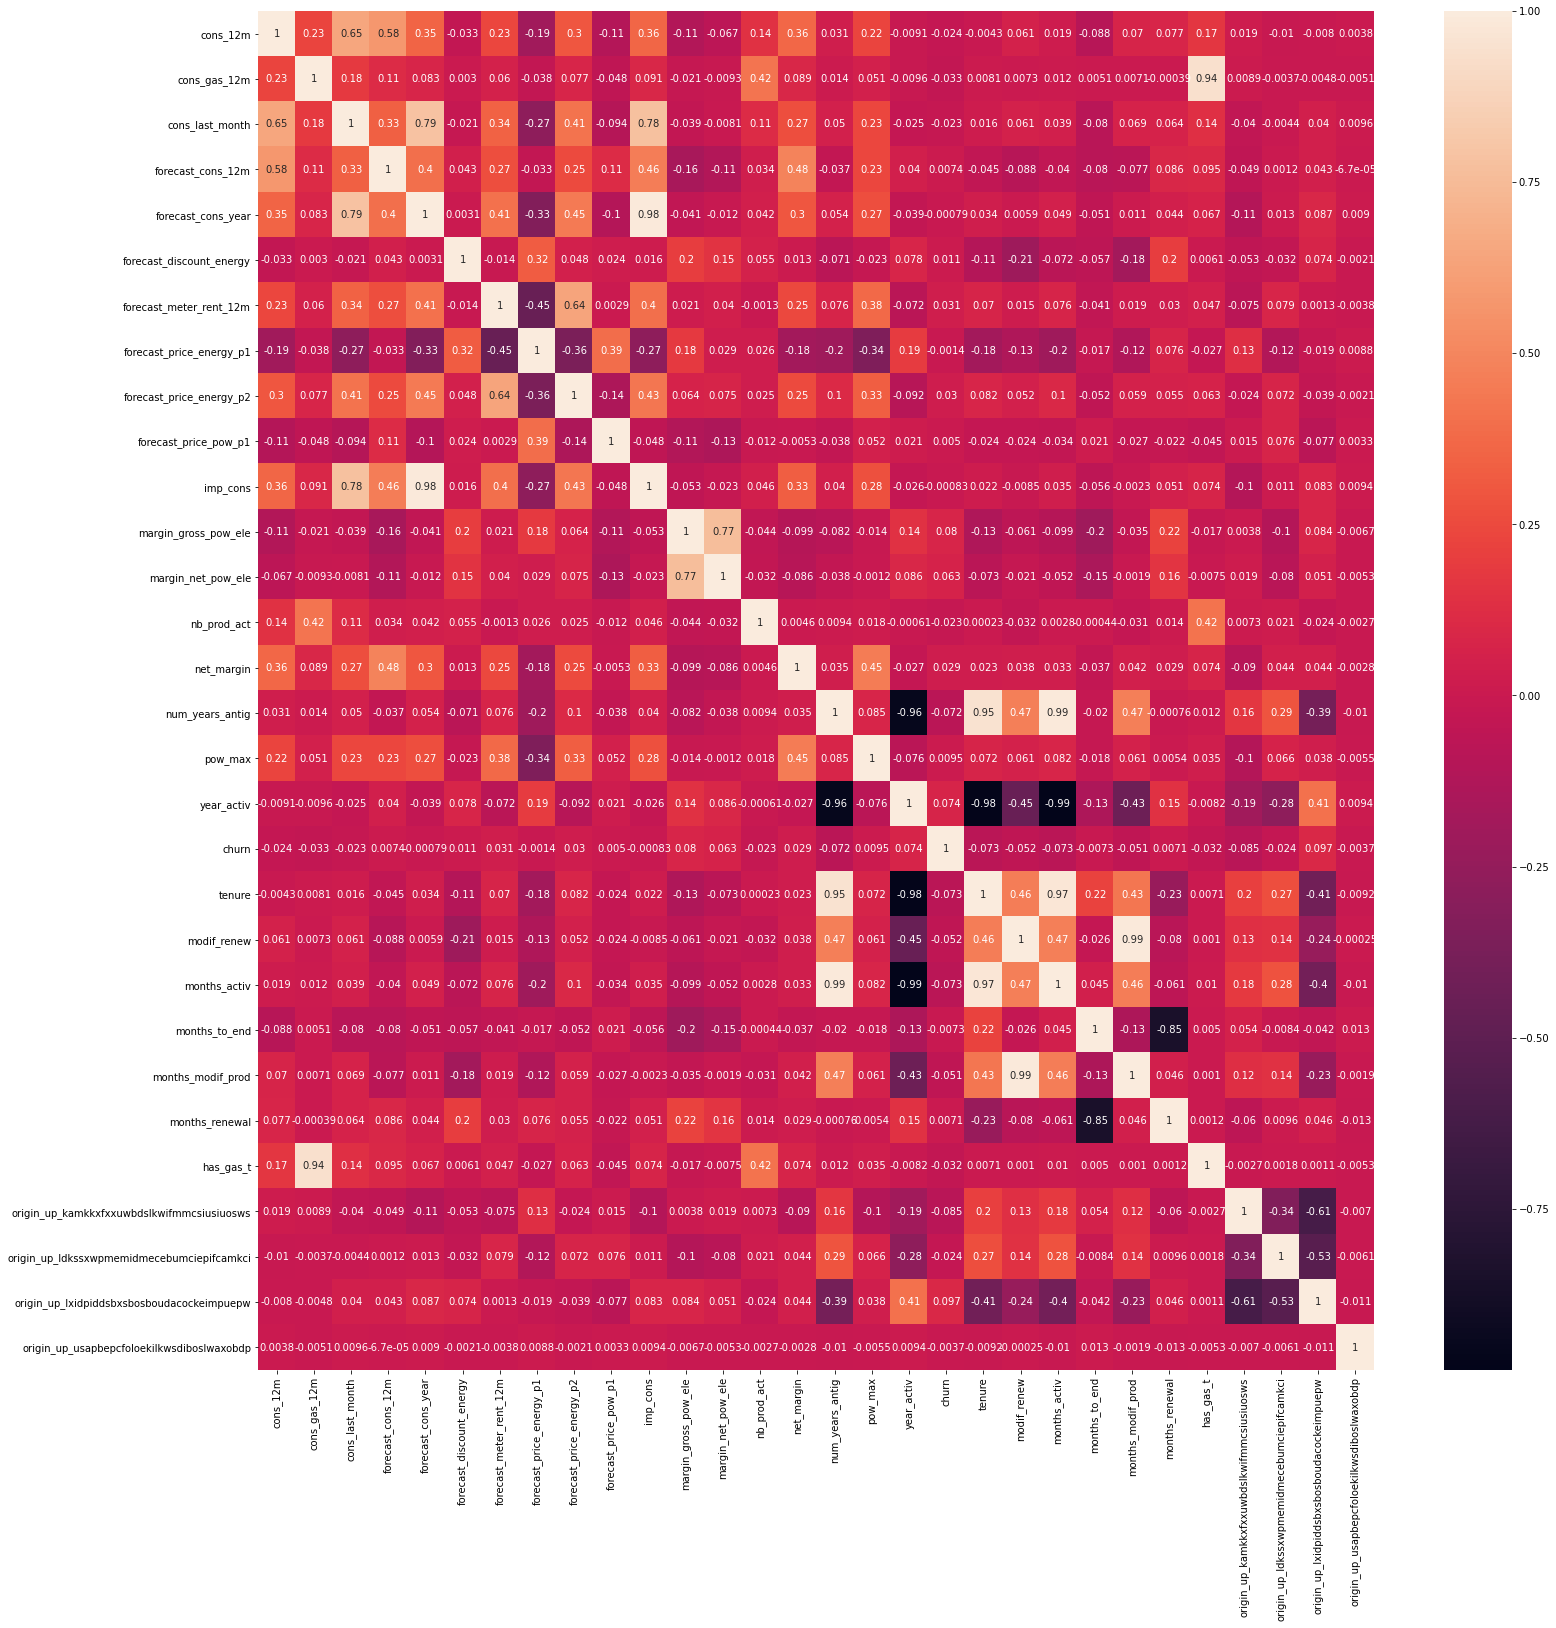

In [49]:
plt.figure(figsize = (25,25))
sns.heatmap(df_final.corr(), annot = True)
plt.show()

In [60]:
df_final.to_csv('dataf.csv', index = False)
df_avg.to_csv('avg_year.csv', index = True)
df_6m.to_csv('avg_6m.csv', index = True)
df_3m.to_csv('avg_3m.csv', index = True)

In [53]:
dff = pd.merge(df_final, df_avg, left_on = 'id', right_index = True)
dff.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,p1_var,p2_var,p3_var,p1_fix,p2_fix,p3_fix
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,2012-11-07,2016-11-06,2012-11-07,2015-11-09,4.423595,4.001128,...,0,1,0,0,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.000000,0.000000,...,0,0,1,0,0.121189,0.101123,0.071837,42.184477,25.392901,15.598651


In [54]:
dff.shape

(16094, 41)

In [56]:
dff = pd.merge(dff, df_6m, left_on = 'id', right_index = True)
dff.shape

(16094, 50)

In [57]:
dff = pd.merge(dff, df_3m, left_on = 'id', right_index = True)
dff.shape

(16094, 59)

In [58]:
dff.to_csv('combine.csv', index = False)

In [59]:
df_6m.head()

,p1_var_6m,p2_var_6m,p3_var_6m,p1_fix_6m,p2_fix_6m,p3_fix_6m,price_p1_6m,price_p2_6m,price_p3_6m
id,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283
0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973
00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000
